In [1]:
import sys
print ('Python : {}'.format(sys.version))

Python : 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]


In [2]:
import scipy
print('Scipy: {}'.format(scipy.__version__))

Scipy: 1.10.1


In [3]:
import numpy
print('Numpy: {}'.format(numpy.__version__))

Numpy: 1.24.3


In [1]:
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))

Matplotlib: 3.7.1


In [2]:
import pandas
print('Pandas: {}'.format(pandas.__version__))

Pandas: 1.5.3


In [3]:
import sklearn
print('Sklearn:{}'.format(sklearn.__version__))

Sklearn:1.2.2


In [9]:
import pandas
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [16]:
dataset = pd.read_csv('iris.csv')
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

In [20]:
#dimension of the dataset
print(dataset.shape)

(150, 5)


In [21]:
print(dataset.head(20))

    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8         

In [23]:
#statistical summary
print(dataset.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [24]:
#class distribution
print(dataset.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


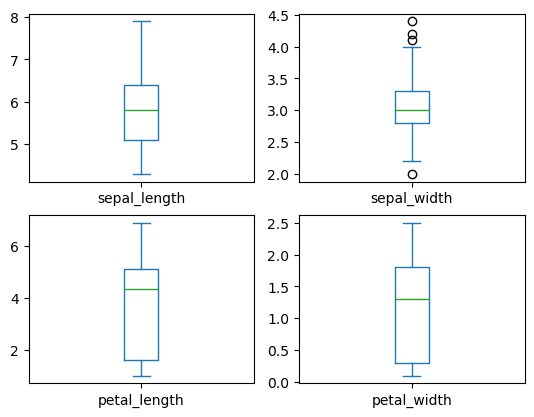

In [25]:
#univariate plots - box and whisker plots
dataset.plot(kind= 'box', subplots = True, layout = (2,2), sharex = False , sharey = False)
pyplot.show()

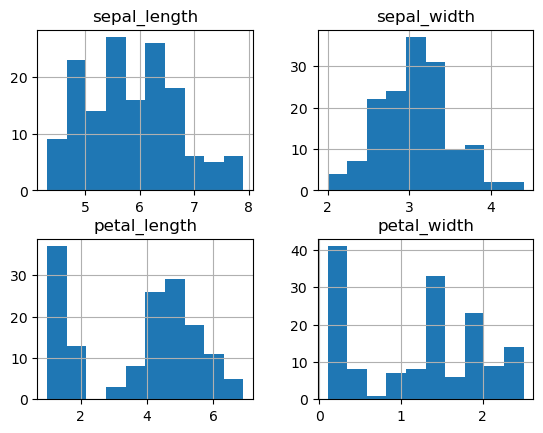

In [26]:
#histogram of the variable
dataset.hist()
pyplot.show()

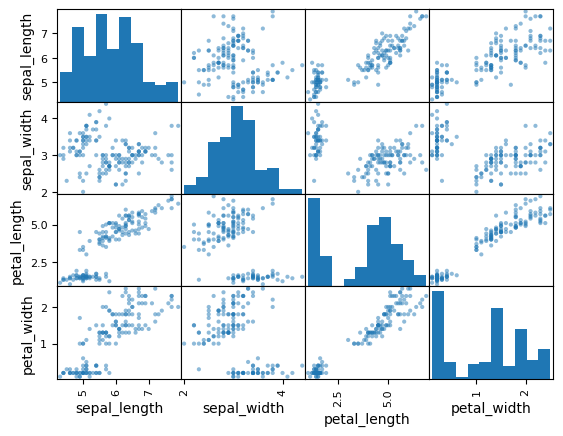

In [27]:
#multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [28]:
# creating a validation dataset
# splitting dataset
array = dataset.values
X = array[:, 0:4]
y = array[:, 4]
X_train, X_validation, Y_train , Y_validation = train_test_split(X, y, test_size = 0.2, random_state= 1)

In [33]:
# Logistic Regression
# Linear Discriminant Analysis
# K-Nearest neighbors
# Classification and Regression Trees
# Gaussian Naive Bayes
# Support Vector Machines

models=[]
models.append(('LR', LogisticRegression( solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [35]:
results =[]
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train , cv=kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s:%f(%f)' % (name, cv_results.mean(), cv_results.std()))

LR:0.950000(0.055277)
LDA:0.975000(0.038188)
KNN:0.958333(0.041667)
NB:0.950000(0.055277)
SVM:0.983333(0.033333)


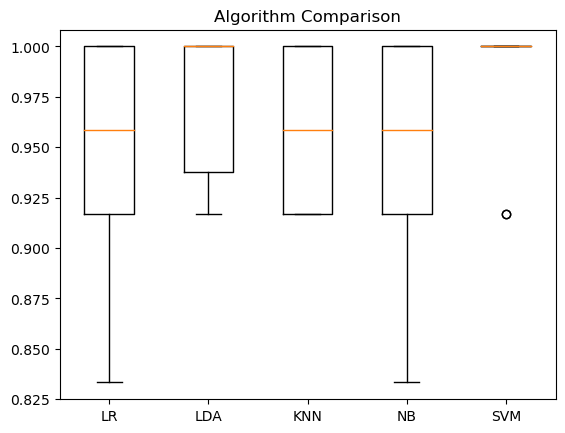

In [36]:
pyplot.boxplot(results, labels= names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [38]:
#predictions on SVC
model = SVC(gamma = 'auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [39]:
#prediction evalution 
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

